In [1]:
%load_ext autoreload
%autoreload 2  # Automatically re-import files when updated

UsageError: unrecognized arguments: # Automatically re-import files when updated


## Data

In [1]:
from data_sets import *

size_training = 5000
size_test = 100
generate_data_set(size_training, TRAINING_IMAGE_DIR) # Training set
generate_data_set(size_test, TEST_IMAGE_DIR) # Test set

## Modeling

In [1]:
from model import build_model, train_model
from tensorflow.keras.losses import CategoricalCrossentropy

# Create model
cce = CategoricalCrossentropy() # Loss function
filters = 24
kernel_size = 5
units = 32
model = build_model(filters, 
                    kernel_size, 
                    units, 
                    ll_activation="softmax", 
                    loss=cce)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 24)        624       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 24)        14424     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 24)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 24)        14424     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 24)        14424     
                                                        

In [2]:
# Train model
n_validation = 625
model = train_model(model, n_validation, epochs=50, write_to_file=True)

Epoch 1/50
137/137 [==============================] - 16s 113ms/step - loss: 2.5159 - val_loss: 1.2759
Epoch 2/50
137/137 [==============================] - 17s 123ms/step - loss: 1.0721 - val_loss: 0.7513
Epoch 3/50
137/137 [==============================] - 19s 138ms/step - loss: 0.6427 - val_loss: 0.4852
Epoch 4/50
137/137 [==============================] - 19s 138ms/step - loss: 0.4268 - val_loss: 0.3254
Epoch 5/50
137/137 [==============================] - 19s 141ms/step - loss: 0.2816 - val_loss: 0.2232
Epoch 6/50
137/137 [==============================] - 19s 142ms/step - loss: 0.2098 - val_loss: 0.1652
Epoch 7/50
137/137 [==============================] - 19s 139ms/step - loss: 0.1598 - val_loss: 0.1257
Epoch 8/50
137/137 [==============================] - 19s 139ms/step - loss: 0.1174 - val_loss: 0.0929
Epoch 9/50
137/137 [==============================] - 19s 140ms/step - loss: 0.0875 - val_loss: 0.0710
Epoch 10/50
137/137 [==============================] - 19s 136ms/step - l

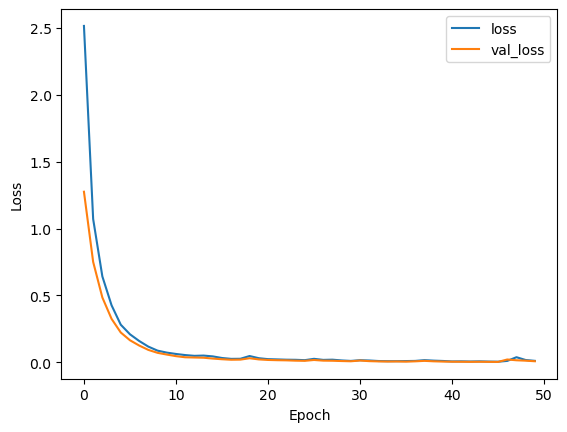

In [4]:
import matplotlib.pyplot as plt

# Create plot for loss evaluation
plt.plot(model.history.history['loss'], label="loss")
plt.plot(model.history.history['val_loss'], label="val_loss")
plt.xlabel("Epoch")
# plt.yscale("log")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Evaluation

In [5]:
from model import evaluate_model

evaluate_model(model)

4/4 [==============================] - 0s 10ms/step - loss: 0.0082


0.008203081786632538

In [6]:
from model import identify, load_model
from PIL import Image

model = load_model()

img = Image.open("data_sets/test_images/J_0.png")

identify(img, model)


1/1 [==============================] - 0s 160ms/step


['J']

## Visualize performance

In [7]:
import os
import tensorflow as tf
from PIL import Image
from data_sets import *
from model import identify

# Create predictions for entire test set
pred_label = []
true_label = []
for img_loc in os.listdir(TEST_IMAGE_DIR):
    true_label.append(img_loc[0])
    img = Image.open(os.path.join(TEST_IMAGE_DIR, img_loc))
    pred_label.append(identify(img, model))
pred_label = sum(pred_label, []) # Flatten list

# Map string into int
map_dict = {"J":0, "Q":1, "K":2}
true_label = [map_dict[i] for i in true_label]
pred_label = [map_dict[i] for i in pred_label]

conf = tf.math.confusion_matrix(true_label, pred_label)   

1/1 [==============================] - 0s 20ms/step


In [8]:
from tensorflow.keras.metrics import Accuracy

# Calculate accuracy
m = Accuracy()
m.update_state(true_label, pred_label)
print(m.result().numpy())

1.0


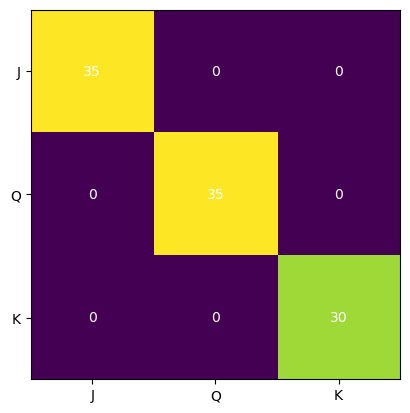

In [9]:
import matplotlib.pyplot as plt

# Visualize confusion matrix
fig, ax = plt.subplots()
ax.imshow(conf, interpolation=None)
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels([i for i in map_dict.keys()])
ax.set_yticklabels([i for i in map_dict.keys()])

# Add counts to true-prediction label
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, conf[i, j].numpy(),
                       ha="center", va="center", color="w")

plt.show()